# Úkol č. 1 - vizualizace dat a web scraping (do 22. března)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.volby.cz týkající se voleb do zastupitelstva Vámi vybraného (většího) města, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Výběr zdroje dat

Vyberte si větší město, které má zastupitelstvo druhu 3 (Zastupitelstvo statutárního města) a strojově stáhněte informace o stranách a kandidátkách z následujících let:
 * [2002](https://www.volby.cz/pls/kv2002/kv12?xjazyk=CZ&xid=0), [2006](https://www.volby.cz/pls/kv2006/kv12?xjazyk=CZ&xid=0), [2010](https://www.volby.cz/pls/kv2010/kv12?xjazyk=CZ&xid=0), [2014](https://www.volby.cz/pls/kv2014/kv12?xjazyk=CZ&xid=0) a [2018](https://www.volby.cz/pls/kv2018/kv12?xjazyk=CZ&xid=0).
 

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data pro vybrané město a uložte je všechny do (asi dvou) přehledných tabulek ve formátu _csv_.
  * Data musí obsahovat _alespoň_ toto:
    * Vývoj výsledků (v procentech i počtu hlasů) pro jednotlivé strany v jednotlivých letech.
    * Seznam všech kandidátů všech stran v jednotlivých letech, u kandidáta by mělo být zaznamenáno: jméno, věk v době voleb, navrhující strana, politická příslušnost, volební zisk (procento i počet hlasů), pořadí na kandidátce, pořadí zvolení, jestli získal mandát (tyto informace získáte souhrnně ve _jmenných seznamech_).
  * V druhé části Vašeho Jupyter notebooku pracujte s těmito tabulkami načtenými z _csv_ souboru (aby opravující nemusel spouštět stahování z webu).
  * Tabulky ve formátu _csv_ také odevzdejte.
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Časový vývoj (po rocích voleb) počtu kandidujících stran i lidí a to celkově i po jednotlivých stranách (ve volbách, kterých se daná strana účastnila).
    * Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.
    * Časový vývoj volební účasti a volebních výsledků jednotlivých stran.
    * Časový vývoj podílu kandidujících s titulem a bez titulu.

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +2 body) U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší, vojenská hodnost atp. Zkuste odhadnout i podíl žen na kandidátkách.
  * (až +4 body) Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.
  * (až +2 body) Najděte nějaký balíček, který Vám dovolí do Vašeho notebooku zavést interaktivní prvky, např. si vyberete v select-boxu stranu a Váš notebook zobrazí grafy pouze pro ni atp.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) se staženými daty.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [570]:
### odtud už je to Vaše
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns

In [593]:
#import tables
kandidati = pd.read_csv('candidates.csv', sep=';').copy()
summary = pd.read_csv('summary.csv',sep=';').copy()
details = pd.read_csv('detail_votes.csv',sep=';').copy()

roky=[2002,2006,2010,2014,2018]

# zobraz informace o tabulkach, datove typy
# kandidati.info()
# summary.info()
# details.info()

# display(kandidati.head())
# display(summary.head())
# display(details.head())

# pridej index kandidatum
kandidati['id'] = range(2203) 



In [572]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
%pylab inline
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


,pocet_stran,pocet_kandidatu
rok,,
2002,11,344
2006,8,244
2010,13,459
2014,17,645
2018,15,511


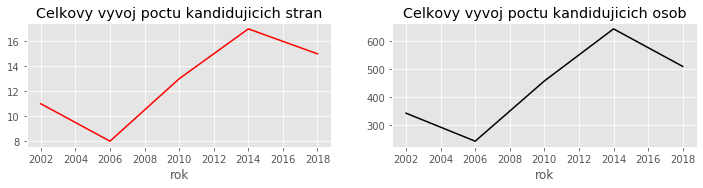

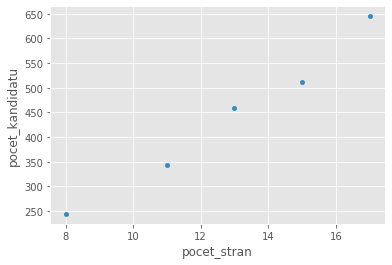

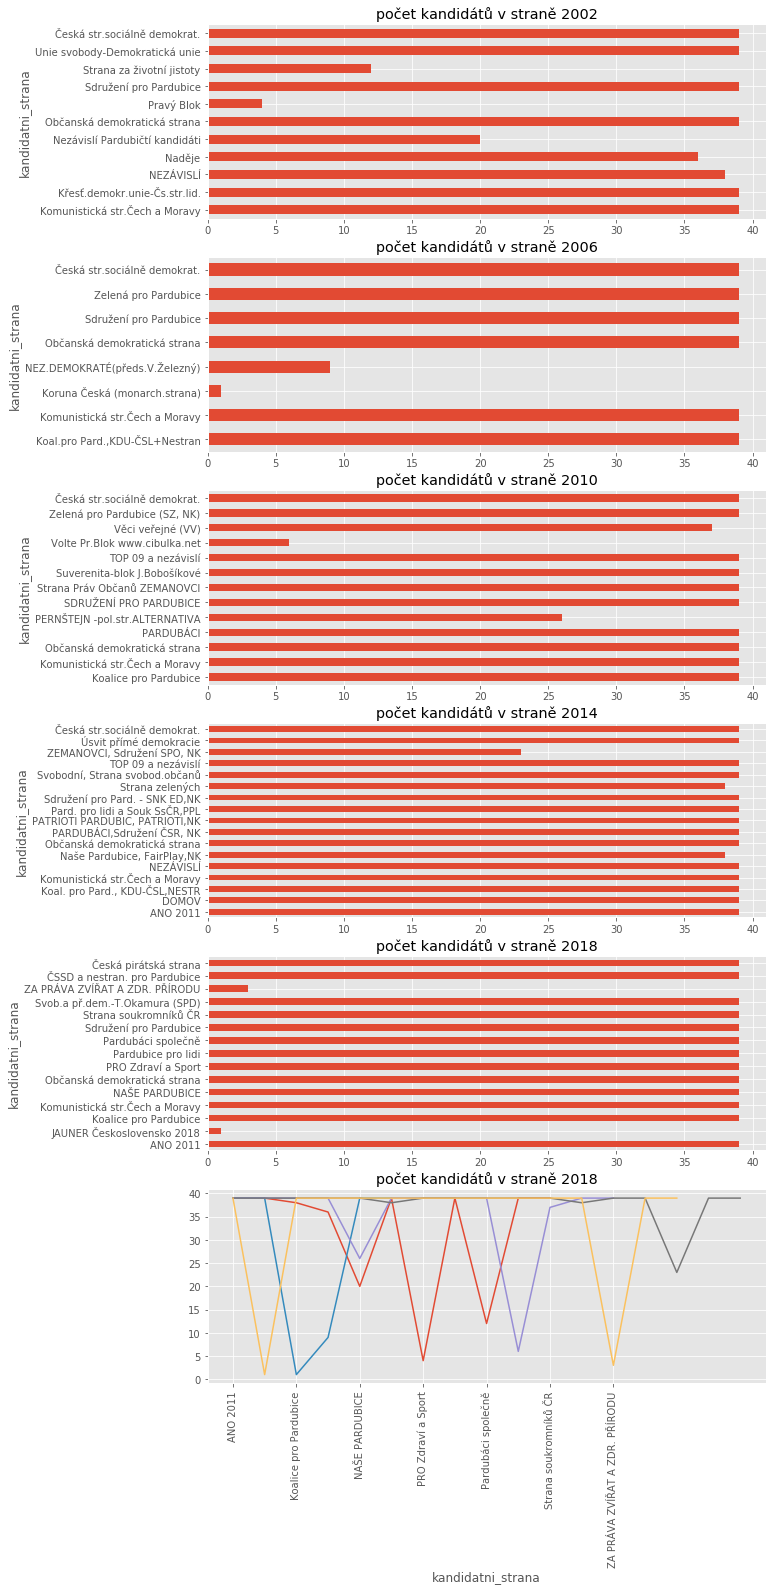

In [592]:
# Časový vývoj (po rocích voleb) počtu kandidujících stran i lidí a to celkově i po jednotlivých stranách (ve volbách, kterých se daná strana účastnila).

# za kazdy rok spocitam unikatni pocet stran
souhrn_kandidati = kandidati.drop(['poradove_cislo','pocet_hlasu_abs','pocet_hlasu_perc','mandat','poradi_zvol_nahradnika','politika_prislusnost','navrhujici_strana'],axis=1)
vyvoj_v_letech = souhrn_kandidati.groupby(by=['rok']).nunique()[['kandidatni_strana','id']]
vyvoj_v_letech = vyvoj_v_letech.rename(columns = {'id':'pocet_kandidatu','kandidatni_strana':'pocet_stran'})


# zobraz vyvoj poctu kandidujicich stran
plt.figure(figsize=(12,5))
plt.subplot(221)
vyvoj_v_letech['pocet_stran'].plot(color='red', title='Celkovy vyvoj poctu kandidujicich stran')


# zobraz vyvoj poctu kandidujicich lidi
plt.subplot(222)
vyvoj_v_letech['pocet_kandidatu'].plot(color='black',title='Celkovy vyvoj poctu kandidujicich osob')


# pomer mezi poctem kandidatu a poctem stran
# display(vyvoj_v_letech)
vyvoj_v_letech.plot(kind='scatter',x='pocet_stran',y='pocet_kandidatu',title='pomer poctu kadndidatu a stran')


# zobraz pro jednotlive roky zastoupeni kandidatu v jednotlivych stranach
frames = []
for i in roky:
    frames.append(souhrn_kandidati[souhrn_kandidati['rok'] == i].groupby(by=['kandidatni_strana']).nunique()['id'])
    
# prehled poctu kandidátů pro jednotlivé strany v jednotlivých letech
plt.figure(figsize=(10,25))
a=0
for i in frames:
    plt.subplot(610+(a+1))
    i.plot.barh(title='počet kandidátů v straně '+str(roky[a]))
    a+=1

a=0
plt.subplot(616)
for i in frames:
    i.plot(kind='line',rot=90,title='počet kandidátů v straně '+str(roky[a]))
    a+=1


,rok,18-30,30-45,45-60,60+
0,2002,49,88,146,61
1,2006,27,77,98,42
2,2010,68,164,163,64
3,2014,95,240,195,115
4,2018,59,183,159,110


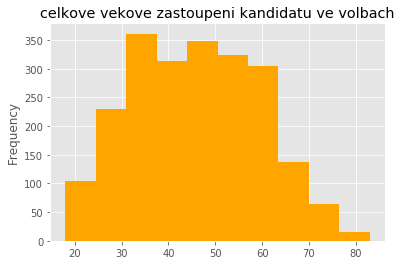

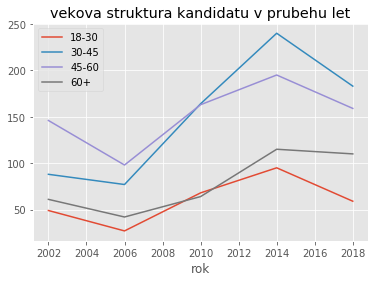

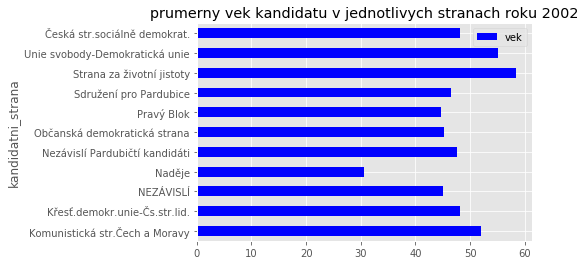

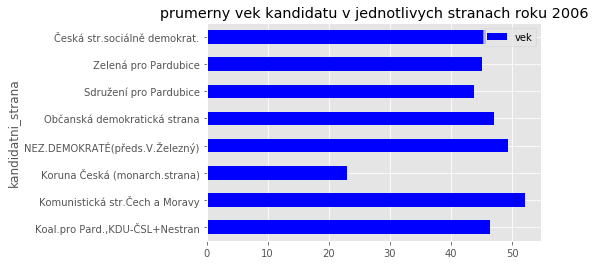

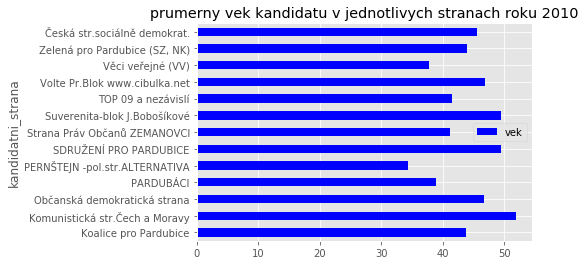

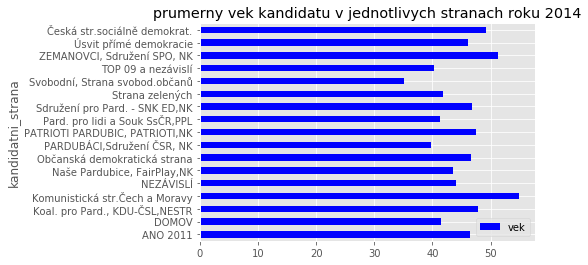

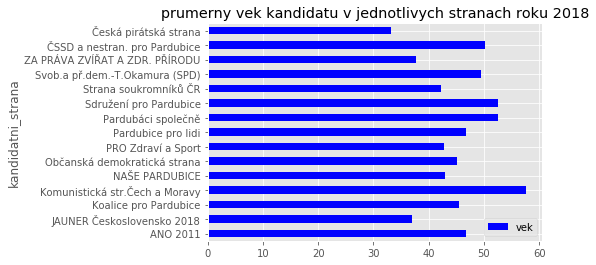

In [575]:
# Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.

# celkovy souhrn veku kandidatu
kandidati.vek.plot.hist(color = 'orange',title='celkove vekove zastoupeni kandidatu ve volbach')

# vekova struktura kandidatu v jednotlivych letech
data = {'rok':roky}
for j in [(18,30),(30,45),(45,60),(60,100)]:
    a=[]
    for i in roky:
        a.append(souhrn_kandidati[(souhrn_kandidati['vek'] >= j[0]) & (souhrn_kandidati['vek'] < j[1]) & (souhrn_kandidati['rok'] == i) ]['vek'].count())
    data[str(j[0])+'-'+str(j[1])] = a
    
vekova_kategorizace = pd.DataFrame(data = data).rename(columns={"60-100":"60+"})
display(vekova_kategorizace)
vekova_kategorizace.plot(x = 'rok',title='vekova struktura kandidatu v prubehu let')


# vekova kategorizace pro jednotlive strany
frames = []
for i in roky:
    frames.append(souhrn_kandidati[souhrn_kandidati['rok'] == i][['vek','kandidatni_strana']])

# show graphs
a = 0
for i in frames:
    i = i.groupby(by='kandidatni_strana').mean()
    i.plot.barh(color='blue',title='prumerny vek kandidatu v jednotlivych stranach roku '+str(roky[a]))
    a+=1


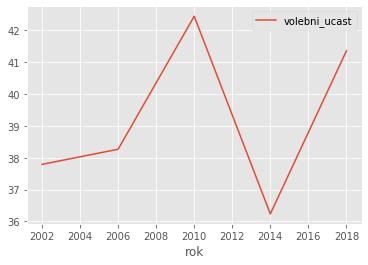

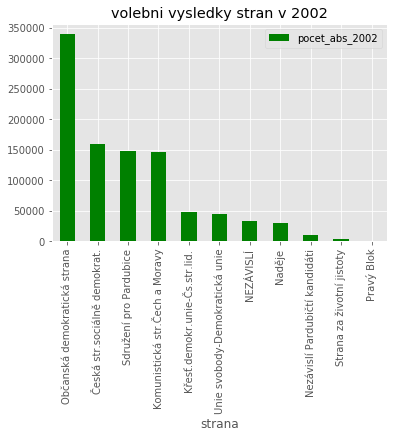

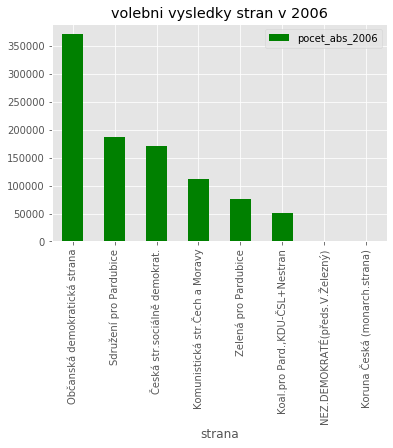

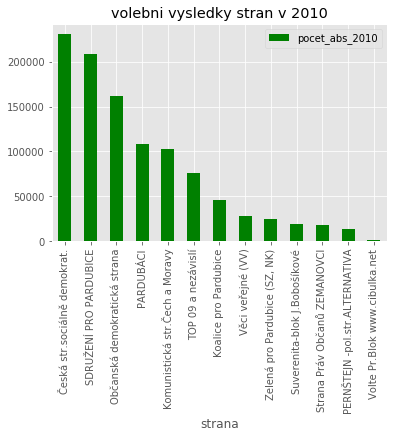

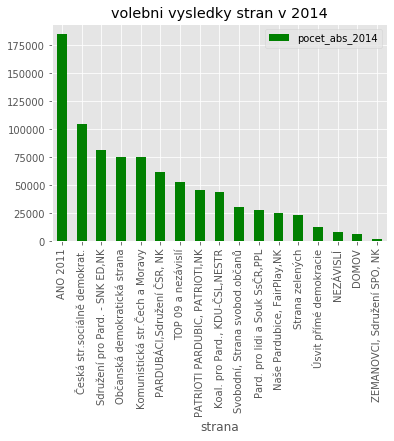

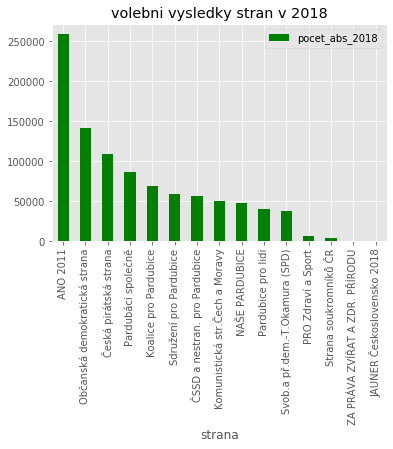

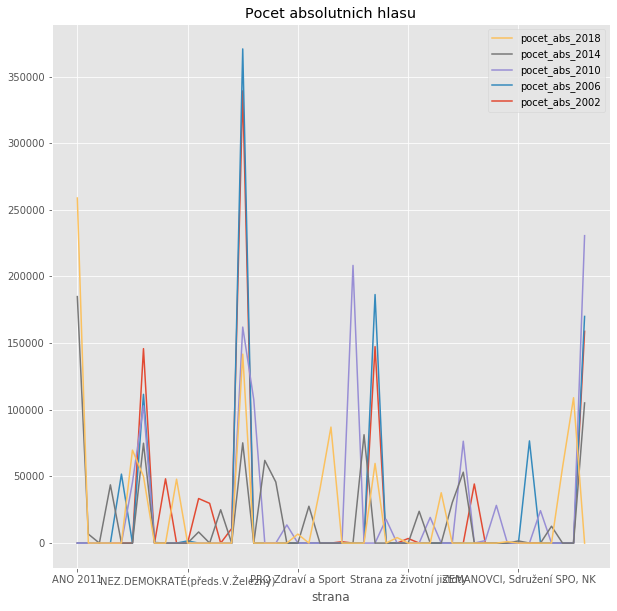

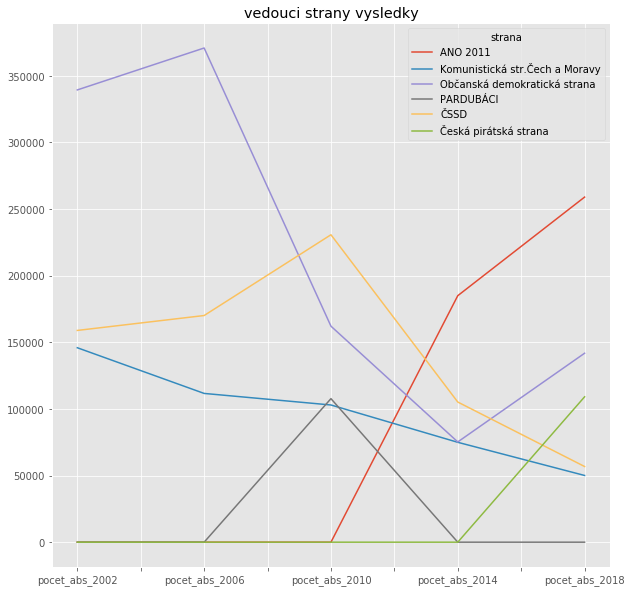

In [576]:
# Časový vývoj volební účasti a volebních výsledků jednotlivých stran.

# casovy vyvoj volebni ucasti v letech
volebni_ucast = summary.copy()[['rok','volebni_ucast']].groupby(by=['rok']).mean()
volebni_ucast.plot()

# volebni vysledky jednotlivych stran
volebni_vysledky = {}
for i in roky:
    volebni_vysledky[str(i)] = pd.DataFrame(data = dict(details[details['rok']==i].groupby(by=['strana']).sum().sort_values(by=['pocet_hlasu_abs'],ascending=False)),columns=['pocet_hlasu_abs']).rename(columns = {'pocet_hlasu_abs':'pocet_abs_'+str(i)})

# show
for i in volebni_vysledky.keys():
    volebni_vysledky[str(i)].plot(kind='bar',color='green',title='volebni vysledky stran v '+str(i))

#vsechny strany v jednom grafu a jejich vysledky v prubehu let
volebni_vysledky = pd.concat(volebni_vysledky[str(i)] for i in roky).groupby(by=['strana']).sum()
volebni_vysledky = volebni_vysledky.T
volebni_vysledky.T.plot(figsize=(10,10),legend='reverse',title='Pocet absolutnich hlasu')
# velice neprehledne, prilis mnoho stran

# provedla jsem rekategorizaci z duvodu koalic za nekolik stran, slouceny vzdy pro jednu z parlamentnich stran
volebni_vysledky['KDU-ČSL'] = (volebni_vysledky['Koal. pro Pard., KDU-ČSL,NESTR']+volebni_vysledky['Koal.pro Pard.,KDU-ČSL+Nestran'])
volebni_vysledky = volebni_vysledky.drop(['Koal. pro Pard., KDU-ČSL,NESTR','Koal.pro Pard.,KDU-ČSL+Nestran'],axis = 1)

volebni_vysledky['ČSSD'] = (volebni_vysledky['ČSSD a nestran. pro Pardubice']+volebni_vysledky['Česká str.sociálně demokrat.'])
volebni_vysledky = volebni_vysledky.drop(['ČSSD a nestran. pro Pardubice','Česká str.sociálně demokrat.'],axis = 1)

volebni_vysledky['Zelená pro Pardubice'] = (volebni_vysledky['Zelená pro Pardubice']+volebni_vysledky['Zelená pro Pardubice (SZ, NK)'])
volebni_vysledky = volebni_vysledky.drop(['Zelená pro Pardubice','Zelená pro Pardubice (SZ, NK)'],axis = 1)

volebni_vysledky['Sdružení pro Pardubice'] = (volebni_vysledky['Sdružení pro Pardubice']+volebni_vysledky['Sdružení pro Pard. - SNK ED,NK']+volebni_vysledky['SDRUŽENÍ PRO PARDUBICE'])
volebni_vysledky = volebni_vysledky.drop(['Sdružení pro Pard. - SNK ED,NK','Sdružení pro Pardubice','SDRUŽENÍ PRO PARDUBICE'],axis = 1)


# vyber top 3 stran z kazdeho roku
volebni_vysledky_top5 = pd.DataFrame({},columns=['strana','pocet_abs_2002','pocet_abs_2006','pocet_abs_2010','pocet_abs_2014','pocet_abs_2018'])

for i in roky:
    volebni_vysledky_top5 = pd.concat([volebni_vysledky_top5,volebni_vysledky.T.sort_values(by=['pocet_abs_'+str(i)],ascending=False).head(3)]).groupby(['strana']).max()

# show
volebni_vysledky_top5.T.plot(figsize=(10,10), title='vedouci strany vysledky')


,obdobi,pocet
0,podil_2002,47.093023
1,podil_2006,56.147541
2,podil_2010,43.137255
3,podil_2014,53.953488
4,podil_2018,49.510763


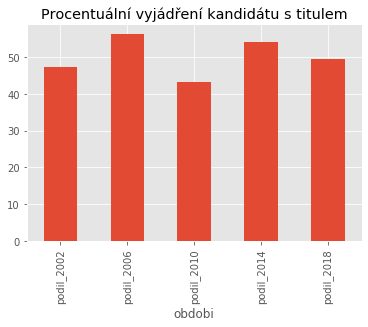

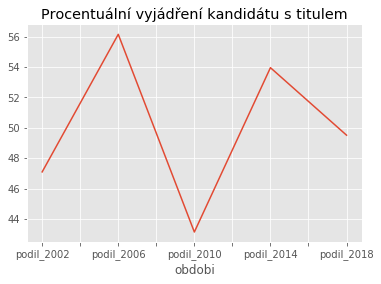

In [581]:
# Časový vývoj podílu kandidujících s titulem a bez titulu.
kandidati['titul'] = kandidati['jmeno'].str.contains('Ing.|Mgr.|MUDr.|Bc.|PharmDr.|doc.|Ph.D.|JUDr.|RNDr.|CSc.|DrSc.|prof|DiS.|PhDr.|PaedDr.|Dr.|RSDr.|MVDr.|Bca|Mga',case=False)

#titul/titul+beztitulu = titul/vsichni
data = {"obdobi":[],"pocet":[]}
for i in [2002,2006,2010,2014,2018]:
    celkem = kandidati[kandidati['rok'] == i]['jmeno'].count()
    s_titulem = kandidati[(kandidati['rok'] == i) & (kandidati['titul'] == True)]['titul'].count()
    data["obdobi"].append('podil_'+str(i))
    data["pocet"].append(s_titulem/celkem * 100)
    
celkovy_pocet = pd.DataFrame(data = data)

display(celkovy_pocet)
celkovy_pocet.plot(kind='bar',x = 'obdobi', legend=False,title='Procentuální vyjádření kandidátu s titulem')
celkovy_pocet.plot(kind='line',x = 'obdobi', legend=False,title='Procentuální vyjádření kandidátu s titulem')
